### Data Story - Question
How does one go about creating a data story? You have some pointers from the material you've just gone through, but they’re probably a bit on the abstract side when you’re just getting started. Also, storytelling is an art, so you have to get your imagination going. Here are some pointers to get those creative juices flowing. In the following sections we will work step-by-step to create your first Data Story.

1. Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.
1. Get going by asking the following questions and looking for the answers with some code and plots:
1. Can you count something interesting?
1. Can you find some trends (high, low, increase, decrease, anomalies)?
1. Can you make a bar plot or a histogram?
1. Can you compare two related quantities?
1. Can you make a scatterplot?
1. Can you make a time-series plot?

Having made these plots,

1. what are some insights you get from them?
1. Do you see any correlations? Is there a hypothesis you would like to investigate further?
1. What other questions do they lead you to ask?

By now you’ve asked a bunch of questions, and found some neat insights.

1. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story?
1. As you work out this story, what are some other trends/relationships you think will make it more complete?

### Approach

#### Data-Set
For this assignment purpose, the dataset will be used from [Kaggle Competition](https://www.kaggle.com/c/avazu-ctr-prediction/). Mostlikely, the same challenge will be capstone project as well.

#### Database
The training data base is access of **6Gb** when unzipped. To start with this for exercise, the data in csv will be converted into sqlite database and sql queries will be used for exploration purpose. Please see **csv_to_sql.ipynb** notebook for this purpose.

### What I am looking for?
This data-set contains data around an ad is being clicked or not. This data-set should be used to predict Click-Through-Rate. For this purpose, it is importat to understand the features that might affect Click-Through-Rate. This exercise will pick a column of the data-set one by one and workout if a particular element in data-set affects Click-Through-Rate or not. This gives insight into the data-set and helps with the modelling and co-relating the machine learning model to the data-set.

### Connect and Load Database

In [4]:
import os
import pandas as pd
from sqlalchemy import create_engine # database connection

def _get_sqldb_url(relative_path):
    abs_path = os.path.abspath(relative_path)
    return ('sqlite:///' + abs_path)
    
disk_engine = create_engine(_get_sqldb_url('../capstone_project/data/train.db'))    
db_df = pd.read_sql_query('SELECT * FROM data LIMIT 3', disk_engine)
print (db_df.columns)
db_df.head()


Index(['index', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')


,index,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1,1000009418151094273,0,2014-10-21 00:00:00.000000,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,2,15706,320,50,1722,0,35,-1,79
1,2,10000169349117863715,0,2014-10-21 00:00:00.000000,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15704,320,50,1722,0,35,100084,79
2,3,10000371904215119486,0,2014-10-21 00:00:00.000000,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15704,320,50,1722,0,35,100084,79


In [5]:
clk_pos = pd.read_sql_query('SELECT COUNT (id) FROM data where click > 0', disk_engine)

In [6]:
clk_neg = pd.read_sql_query('SELECT COUNT (id) FROM data where click == 0', disk_engine)

In [7]:
clk_total = pd.read_sql_query('SELECT COUNT (id) FROM data', disk_engine)

### Exploration - 1: Click Through Rate

In [8]:
s_rate = clk_pos.ix[0][0]/clk_total.ix[0][0]
f_rate = clk_neg.ix[0][0]/clk_total.ix[0][0]

In [9]:
print('The success rate (Click-Through-Rate) is {:.2%} and failure rate is {:.2%} for {} clicks!'.format(s_rate, f_rate, clk_total.ix[0][0]))

The success rate (Click-Through-Rate) is 16.98% and failure rate is 83.02% for 40428967 clicks!


In [66]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


### Exploration - 2: Click count per day of the week

In [81]:
query = "select "\
            " cast (strftime('%w', hour) as integer) as day_num, "\
            "case cast (strftime('%w', hour) as integer)  "\
            "when 0 then 'Sunday'  "\
            "when 1 then 'Monday'  "\
            "when 2 then 'Tuesday'  "\
            "when 3 then 'Wednesday'  "\
            "when 4 then 'Thursday'  "\
            "when 5 then 'Friday'  "\
            "else 'Saturday' end as day_of_week,  "\
            "COUNT (click) as click_count "\
        "from data "\
        "where click > 0 "\
        "group by day_of_week "\
        "order by day_num"
        
clk_grp_by_day = pd.read_sql_query(query, disk_engine)

Plotting the graphs for click counts through as days of the week.

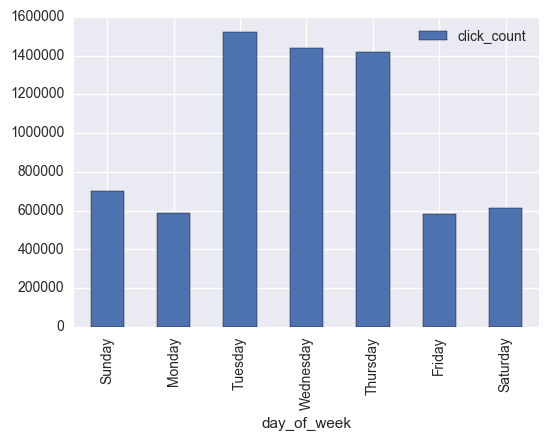

In [180]:
data_pos = clk_grp_by_day[['day_of_week', 'click_count']].set_index('day_of_week')
data_pos.plot(kind='bar')

Clearly, the day of week matters for converting the clicks. It seems busier by 3x over the middle of the week (Tuesday, Wednesday, and Thursday). Tuesday seems the busiest of lot!

In [177]:
query = "select "\
            " cast (strftime('%w', hour) as integer) as day_num, "\
            "case cast (strftime('%w', hour) as integer)  "\
            "when 0 then 'Sunday'  "\
            "when 1 then 'Monday'  "\
            "when 2 then 'Tuesday'  "\
            "when 3 then 'Wednesday'  "\
            "when 4 then 'Thursday'  "\
            "when 5 then 'Friday'  "\
            "else 'Saturday' end as day_of_week,  "\
            "COUNT (click) as click_count "\
        "from data "\
        "where click == 0 "\
        "group by day_of_week "\
        "order by day_num"
        
clk_grp_by_day_neg = pd.read_sql_query(query, disk_engine)

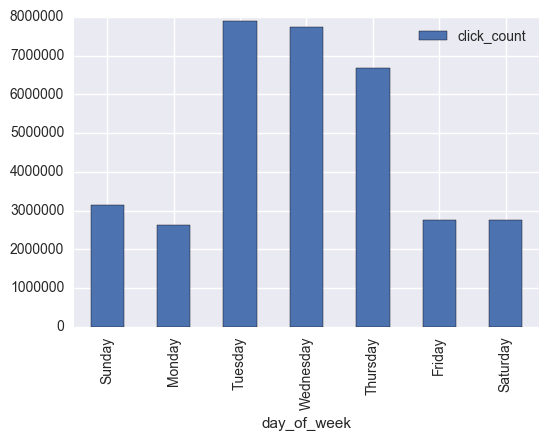

In [183]:
data_neg = clk_grp_by_day_neg[['day_of_week', 'click_count']].set_index('day_of_week')
data_neg.plot(kind='bar')

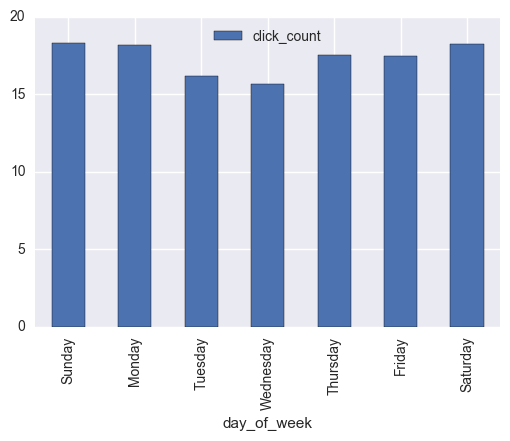

In [194]:
data_percent = data_pos * 100 / (data_neg + data_pos)
data_percent.plot(kind='bar')

In [195]:
print ('The Click Through Rate on Tuesday is {:0.2f}%.'.format(data_percent.ix['Tuesday'].iloc[0]))

The Click Through Rate on Tuesday is 16.18%.


Since on the busiest day of thw week, the **Click-Through-Rate** is lower than **Click-Through-Rate** of the whole database, the day of the week is not really feature affecting the Click-Through-Rate!

### Exploration - 3: Click count per hour of the day

In [11]:
query = "select "\
            "strftime('%H', hour) as hour_of_the_day,  "\
            "COUNT (click) as click_count "\
        "from data "\
        "where click > 0 "\
        "group by hour_of_the_day"

clk_grp_by_hour = pd.read_sql_query(query, disk_engine)

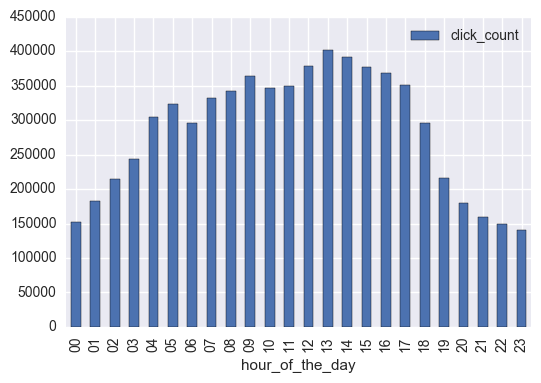

In [86]:
data = clk_grp_by_hour.set_index('hour_of_the_day')
data.plot(kind='bar')

In [133]:
query = "select "\
            "strftime('%H', hour) as hour_of_the_day,  "\
            "COUNT (click) as no_click_count "\
        "from data "\
        "where click == 0 "\
        "group by hour_of_the_day"

clk_grp_by_hour_neg = pd.read_sql_query(query, disk_engine)

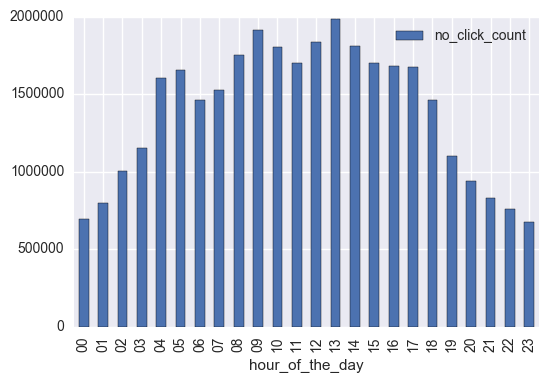

In [135]:
data = clk_grp_by_hour_neg.set_index('hour_of_the_day')
data.plot(kind='bar')

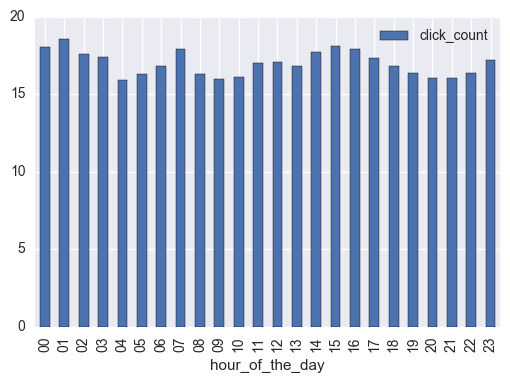

In [161]:
#data = clk_grp_by_hour.div(clk_grp_by_hour_neg.no_click_count)
data_pos = clk_grp_by_hour.set_index('hour_of_the_day')
data_neg = clk_grp_by_hour_neg.set_index('hour_of_the_day')
data_neg.rename(columns={'no_click_count': 'click_count'}, inplace=True)
data_percent = data_pos * 100 / (data_neg + data_pos)
data_percent.plot(kind='bar')

In [176]:
print ('The percentage of sucess rate through different hour of the day is {0:.2f}%.'.format(data_percent.mean().ix[0]))

The percentage of sucess rate through different hour of the day is 17.01%.


Since the distribution and the mean success rate through out the day is the similar to Click-Through-Rate for the whole data-set, the time of the day is not the feature affecting the Click-Through-Rate.

### Exploration - 4: Is C1 a feature affecting Click-Through-Rate?

### 4A: C1 values when click count is positive

In [12]:
query = "select "\
            "C1, "\
            "COUNT (click) as click_count "\
        "from data "\
        "where click > 0 "\
        "group by C1 "\
        "order by 2"

clk_grp_by_C1 = pd.read_sql_query(query, disk_engine)

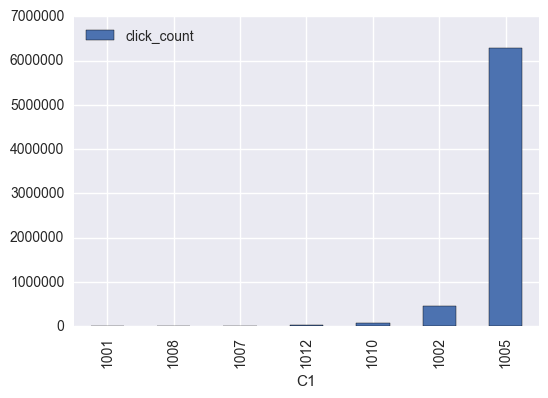

In [207]:
data = clk_grp_by_C1.set_index('C1')
data.plot(kind='bar')

In [13]:
query = "select "\
            "C1, "\
            "strftime('%H', hour) as hour_of_the_day,  "\
            "COUNT (click) as click_count "\
        "from data "\
        "where click > 0 and C1 == 1005 "\
        "group by hour_of_the_day "\
        "order by hour_of_the_day"

clk_grp_C1_1005 = pd.read_sql_query(query, disk_engine)

### 4B: C1 distribution by hour of the day for positive clicks when C1 == 1005

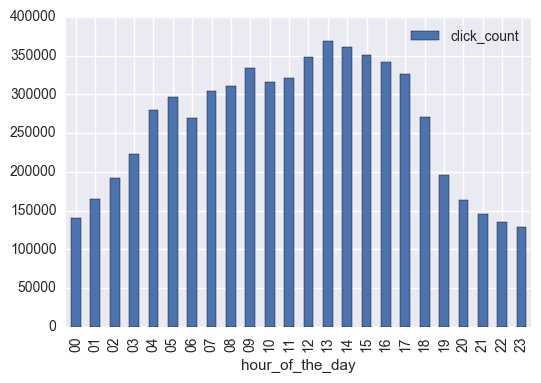

In [91]:
clk_grp_C1_1005
data = clk_grp_C1_1005[['hour_of_the_day', 'click_count']].set_index('hour_of_the_day')
data.plot(kind='bar')

### 4C: C1 values when clicks were not successful

In [93]:
query = "select "\
            "C1, "\
            "COUNT (click) as no_click_count "\
        "from data "\
        "where click = 0 "\
        "group by C1 "\
        "order by 2"

clk_grp_by_C1_neg = pd.read_sql_query(query, disk_engine)

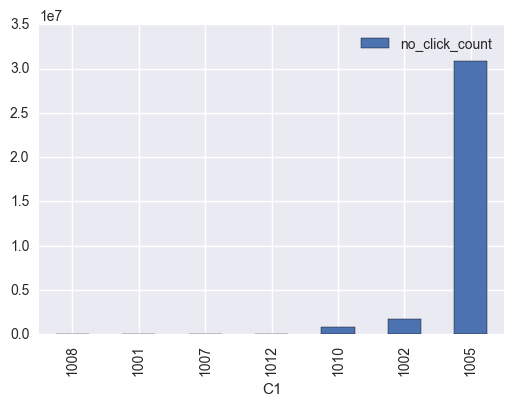

In [94]:
data = clk_grp_by_C1_neg.set_index('C1')
data.plot(kind='bar')

### 4D: Analysis of C1 data

In [132]:
click_miss = clk_grp_by_C1_neg[clk_grp_by_C1_neg.C1 == 1005].iloc[0][1]
click_hit = clk_grp_by_C1[clk_grp_by_C1.C1 == 1005].iloc[0][1]
ratio = click_hit / (click_hit + click_miss)

In [131]:
print ("Total entries with C1 == 1005: {}".format(click_hit + click_miss))
print ("Total entries with C1 != 1005: {}".format(clk_total.ix[0][0] - click_hit - click_miss))
print ("% entries with C1 == 1005: {:.2%}".format((click_hit + click_miss) / clk_total.ix[0][0]))
print ("Click-Through-Rate when C1 == 1005: {:.2%}".format(ratio))
print ("Click-Through-Rate for the whole data set: {:.2%}".format(s_rate))
print ("From the above data, it seems that C1 is not feature affecting CTR")

Total entries with C1 == 1005: 37140632
Total entries with C1 != 1005: 3288335
% entries with C1 == 1005: 91.87%
Click-Through-Rate when C1 == 1005: 16.93%
Click-Through-Rate for the whole data set: 16.98%
From the above data, it seems that C1 is not feature affecting CTR


### Exploration - 5: Click count based on site category

In [200]:
#query = "select "\
#            "site_category, "\
#            "strftime('%H', hour) as hour_of_the_day,  "\
#            "COUNT (click) as click_count "\
#        "from data "\
#        "where click > 0 "\
#        "group by site_category, hour_of_the_day "\
#        "order by 1, 2"

#clk_grp_sg_hr = pd.read_sql_query(query, disk_engine)

query = "select "\
            "site_category, "\
            "COUNT (click) as click_count "\
        "from data "\
        "where click > 0 "\
        "group by site_category "\
        "order by 1"

clk_grp_sg = pd.read_sql_query(query, disk_engine)

In [205]:
#temp = clk_grp_sg_hr['site_category'].groupby(by='site_category')
#df = clk_grp_sg_hr[['site_category', 'click_count']].groupby(by=['site_category']).sum()
#df.plot(kind='bar')

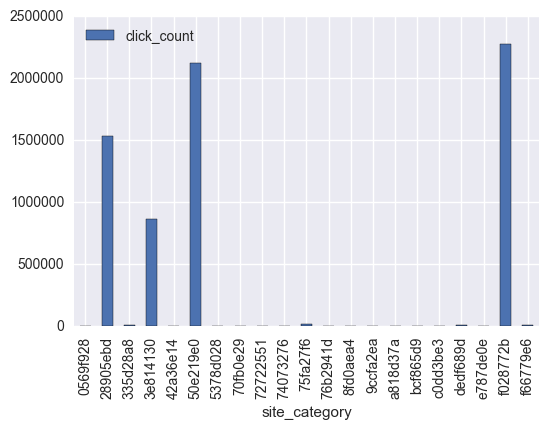

In [206]:
clk_grp_sg.set_index('site_category').plot(kind='bar')

In [197]:
query = "select "\
            "site_category, "\
            "COUNT (click) as click_count "\
        "from data "\
        "where click == 0 "\
        "group by site_category "\
        "order by 1"

clk_grp_sg_neg = pd.read_sql_query(query, disk_engine)

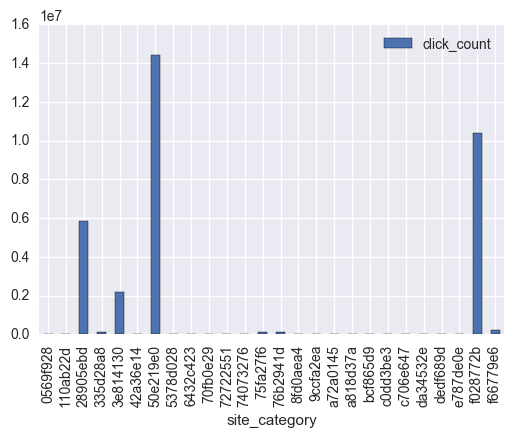

In [204]:
clk_grp_sg_neg.set_index('site_category').plot(kind='bar')

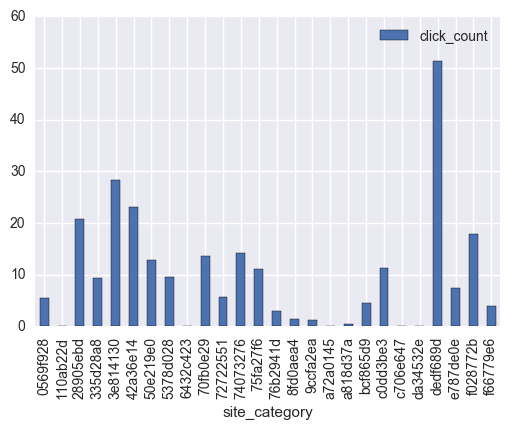

In [208]:
data_pos = clk_grp_sg.set_index('site_category')
data_neg = clk_grp_sg_neg.set_index('site_category')
data_percent = data_pos * 100 / (data_neg + data_pos)
data_percent.plot(kind='bar')

### Analysis:

Clearly, from above chart, it can be observed that certain site categories are more successfull than other. **Site Catrgory** can be feature that can impact the **Click-Through-Rate**!!

In [244]:
def _get_click_count_query(column_name, pos=True):
    query = "select "\
                + column_name + ",  "\
                "COUNT (click) as click_count "\
            "from data "
    if pos:
        query += "where click > 0 "
    else:
        query += "where click == 0 "
        
    query += "group by 1 order by 1"
    return query

def _data_percentage(data_pos, data_neg, plot=True):
    data_percent = data_pos * 100 / (data_neg + data_pos)
    if plot:
        data_percent.plot(kind='bar')
    return data_percent

In [218]:
#query = "select "\
#            "site_category, "\
#            "C1, "\
#            "COUNT (click) as click_count "\
#        "from data "\
#        "where click > 0 "\
#        "group by site_category, C1 "\
#        "order by 1, 2"
        
#clk_grp_sg_C1 = pd.read_sql_query(query, disk_engine).sort_values(by='click_count', ascending=False)
#clk_grp_sg_C1 = pd.read_sql_query(query, disk_engine)

query = _get_click_count_query('banner_pos')
clk_grp_pos = pd.read_sql_query(query, disk_engine)

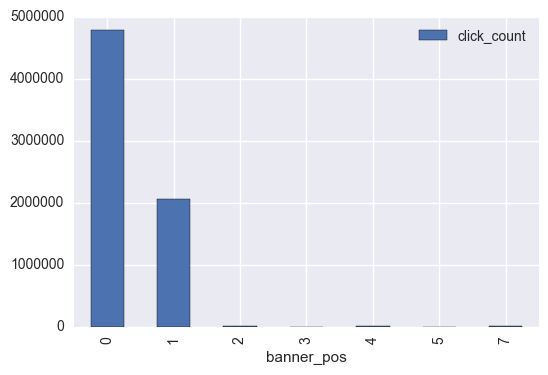

In [228]:
data_pos = clk_grp_pos.set_index('banner_pos')
data_pos.plot(kind='bar')

In [222]:
query = _get_click_count_query('banner_pos', pos=False)
clk_grp_neg = pd.read_sql_query(query, disk_engine)

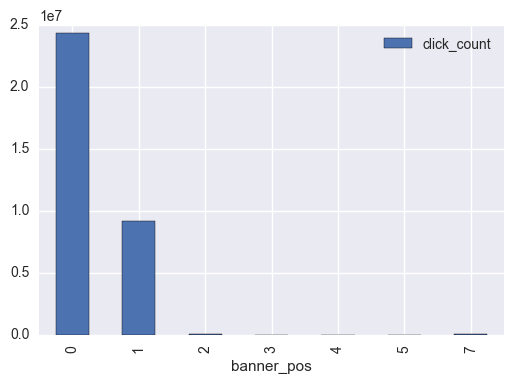

In [227]:
data_neg = clk_grp_neg.set_index('banner_pos')
data_neg.plot(kind='bar')

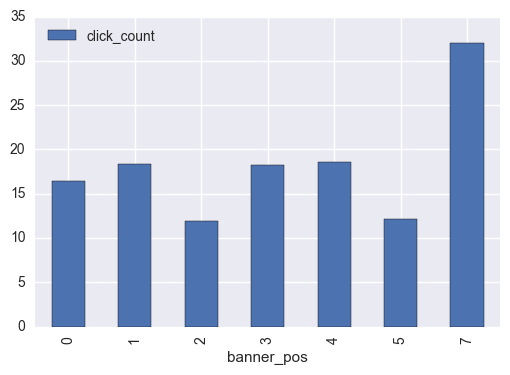

In [245]:
data_percent = _data_percentage(data_pos, data_neg, plot=True)

In [238]:
data_pos.ix[7][0] + data_neg.ix[7][0]

43577

### Analysis:
Since most of the ads are placed with banner_pos 0 and 1, and the Click-Through-Rate for these banner positions is similar to the whole data-set, banner_pos is **not a feature affecting** the **Click-Through-Rate**. The banner_pos 7 has twice as much success. However, it features only in **43577** rows which is fraction of 40 million+ rows.

### Exploraion - 6: Check if app_category and device_id 

In [247]:
#db_df = pd.read_sql_query('SELECT * FROM data LIMIT 3', disk_engine)
#db_df.columns
#features = ['app_category', 'device_id', 'device_ip', 'device_model', 'device_type',
#            'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
features = ['app_category', 'device_id']
features_pos = {}
features_neg = {}
features_percent = {}

for feature in features:
    clk_grp_pos = pd.read_sql_query(_get_click_count_query(feature, pos=True), disk_engine)
    clk_grp_neg = pd.read_sql_query(_get_click_count_query(feature, pos=False), disk_engine)
    features_pos[feature] = clk_grp_pos.set_index(feature)
    features_neg[feature] = clk_grp_neg.set_index(feature)
    features_percent[feature] = _data_percentage(features_pos[feature], features_neg[feature], plot=False)
    

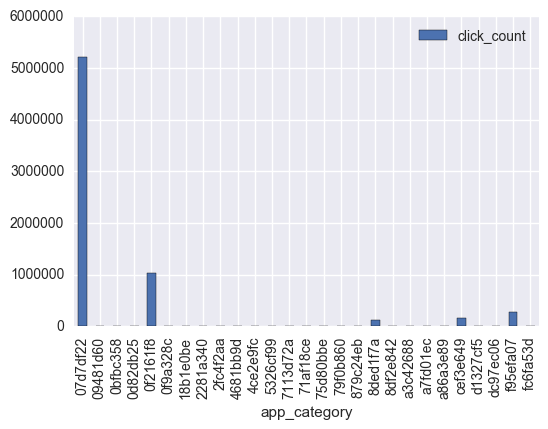

In [248]:
features_pos['app_category'].plot(kind='bar')

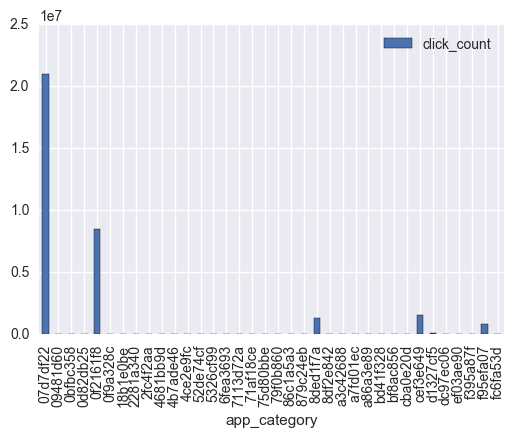

In [249]:
features_neg['app_category'].plot(kind='bar')

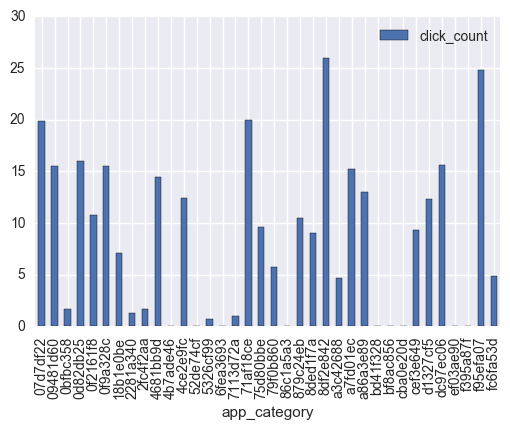

In [250]:
features_percent['app_category'].plot(kind='bar')

In [273]:
features_neg['device_id'].head()

,click_count
device_id,
00000414,1
00000715,1
00000919,1
00000b7c,1
00001237,6
